In [1]:
# Fix randomness and hide warnings
seed = 69420

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

2.14.0


In [2]:
categories_path = '../data/categories.npy'
data_path = '../data/training_data.npy'
valid_path = '../data/valid_periods.npy'
categories = np.load(categories_path, allow_pickle=True)
dataset = np.load(data_path, allow_pickle=True)
valid = np.load(valid_path, allow_pickle=True)
print('Data loaded')

Data loaded


In [3]:
valid_df = pd.DataFrame(valid)
valid_df

,0,1
0,2325,2776
1,2325,2776
2,2325,2776
3,2712,2776
4,2682,2776
...,...,...
47995,2642,2776
47996,2642,2776
47997,2676,2776
47998,2676,2776


In [4]:
df = pd.DataFrame(dataset).T
df

,0,1,2,3,4,5,6,7,8,9,...,47990,47991,47992,47993,47994,47995,47996,47997,47998,47999
0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,0.640741,0.640,0.932531,0.486370,0.704545,0.673469,0.841492,0.82875,0.119403,0.107014,...,0.082809,0.749190,0.732024,0.653406,0.733459,0.319784,0.494914,0.588816,0.523316,0.576220
2772,0.516667,0.536,0.955206,0.450502,0.863636,0.653061,0.878788,0.86250,0.130258,0.098921,...,0.072276,0.824082,0.701938,0.589687,0.807554,0.447455,0.504665,0.625000,0.445596,0.588415
2773,0.602778,0.600,0.960481,0.470588,0.727273,0.653061,0.841492,0.86250,0.124830,0.098022,...,0.071384,0.898371,0.783550,0.602126,0.882692,0.454175,0.504545,0.526316,0.445596,0.542683
2774,0.367593,0.460,0.946506,0.569584,0.818182,0.632653,0.841492,0.87625,0.132972,0.091727,...,0.071545,0.048314,0.808614,0.611088,0.051239,0.623485,0.521760,0.582237,0.585492,0.609756


In [5]:
#convert the numbers in the new_df to np.float32
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Columns: 48000 entries, 0 to 47999
dtypes: float32(48000)
memory usage: 508.3 MB


In [6]:
test_size = 100
X_train_raw = df.iloc[:,:-test_size]
X_test_raw = df.iloc[:,-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

(2776, 47900) (2776, 100)


In [7]:
window = 200
stride = 10
telescope = 18

In [8]:
future = df[-window:]
future = np.expand_dims(future, axis=0)
future.shape

(1, 200, 48000)

In [9]:


'''dataset = []
labels = []

for i in range(len(df.columns)):
    for idx in np.arange(valid[i][0], len(temp_df)-window-telescope, stride):
        dataset.append(temp_df[idx:idx+window,i])
        labels.append(temp_df[idx+window:idx+window+telescope,i])
dataset = np.array(dataset)
dataset = np.transpose(dataset)
labels = np.array(labels)
labels = np.transpose(labels)
data_df = pd.DataFrame(labels)
data_df
'''

'dataset = []\nlabels = []\n\nfor i in range(len(df.columns)):\n    for idx in np.arange(valid[i][0], len(temp_df)-window-telescope, stride):\n        dataset.append(temp_df[idx:idx+window,i])\n        labels.append(temp_df[idx+window:idx+window+telescope,i])\ndataset = np.array(dataset)\ndataset = np.transpose(dataset)\nlabels = np.array(labels)\nlabels = np.transpose(labels)\ndata_df = pd.DataFrame(labels)\ndata_df\n'

In [10]:
def build_sequences(df, target_labels, window, stride, telescope):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    target = df.columns
    
    mode= "train"
    
    if mode == "train":
        temp_df = df.copy().values
        temp_label = df[target].copy().values

        for i in range(len(df.columns)):
            series_len = valid[i][1] - test_size - valid [i][0]
            padding_check = series_len%window
            if(padding_check != 0):
                padding_len = window - padding_check
                if valid[i][0] - padding_len < 0:
                    valid[i][0] = valid[i][0] - padding_len + window
                else:
                    valid[i][0] -= padding_len         
            for idx in np.arange(valid[i][0], len(temp_df)-window-telescope, stride):
                dataset.append(temp_df[idx:idx+window, i])
                labels.append(temp_df[idx+window:idx+window+telescope, i])
    else:
        temp_df = df.copy().values
        
        padding_check = len(df)%window

        if(padding_check != 0):
            # Compute padding length
            padding_len = window - len(df)%window
            padding = np.zeros((padding_len,temp_df.shape[1]), dtype='float32')
            temp_df = np.concatenate((padding,df))
            assert len(temp_df) % window == 0
        
        for i in range(len(df.columns)):
            for idx in np.arange(0,len(temp_df)-window-telescope,stride):
                dataset.append(temp_df[idx:idx+window, i])
                labels.append(temp_df[idx+window:idx+window+telescope, i])
            

    dataset = np.array(dataset)
    labels = np.array(labels)
    
    '''
    dataset = np.transpose(dataset)
    labels = np.transpose(labels)
    '''
    return dataset, labels

In [11]:
target_labels = df.columns
target_labels

RangeIndex(start=0, stop=48000, step=1)

In [12]:
'''test = pd.DataFrame()
test'''

'test = pd.DataFrame()\ntest'

In [13]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window, stride, telescope)
X_test, y_test = build_sequences(X_test_raw, target_labels, window, stride, telescope)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((456527, 200), (456527, 18), (2644, 200), (2644, 18))

In [14]:
'''X_train = np.expand_dims(X_train, 1)
y_train = np.expand_dims(y_train, 1)
X_test = np.expand_dims(X_test, 1)
y_test = np.expand_dims(y_test, 1)'''
X_train

array([[0.        , 0.        , 0.        , ..., 0.18333334, 0.1388889 ,
        0.16111112],
       [0.        , 0.        , 0.        , ..., 0.28611112, 0.2574074 ,
        0.21574074],
       [0.        , 0.        , 0.        , ..., 0.28425926, 0.30925927,
        0.31944445],
       ...,
       [0.8802951 , 0.87125176, 0.8605426 , ..., 0.39505   , 0.39623988,
        0.41361257],
       [0.81128037, 0.802951  , 0.7946216 , ..., 0.447406  , 0.44312233,
        0.44121847],
       [0.750595  , 0.74535936, 0.73346025, ..., 0.41789624, 0.42170396,
        0.41408852]], dtype=float32)

In [15]:
batch_size = 128
epochs = 200

In [16]:
def build_CONV_LSTM_model(input_shape, output_shape):
    
    '''# Define the input layer with the specified shape
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')
    # Add a Bidirectional LSTM layer with 64 units
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm')(input_layer)
    # Add a 1D Convolution layer with 128 filters and a kernel size of 3
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu', name='conv')(x)
    x = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True, name='lstm'), name='bidirectional_lstm2')(x)
    x = tfkl.Conv1D(256, 3, padding='same', activation='relu', name='conv2')(x)
    x = tfkl.Dropout(.25)(x)
    x = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True, name='lstm'), name='bidirectional_lstm3')(x)
    x = tfkl.Conv1D(256, 3, padding='same', activation='relu', name='conv3')(x)
    x = tfkl.Dense(telescope, activation = "relu")(x)
    x = tfkl.Dropout(.25)(x)
    # Add a final Convolution layer to match the desired output shape
    output_layer = tfkl.Conv1D(1, 3, padding='same', name='output_layer')(x)
    # Calculate the size to crop from the output to match the output shape
    crop_size = 200-18
    # Crop the output to the desired length
    output_layer = tfkl.Cropping1D((0, crop_size), name='cropping')(output_layer)
    # Construct the model by connecting input and output layers
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='CONV_LSTM_model')
    # Compile the model with Mean Squared Error loss and Adam optimizer
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())
'''
    # Define the input layer with the specified shape
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Add a Bidirectional LSTM layer with 64 units
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm')(input_layer)

    # Add a 1D Convolution layer with 128 filters and a kernel size of 3
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu', name='conv')(x)

    # Add a final Convolution layer to match the desired output shape
    output_layer = tfkl.Conv1D(1, 3, padding='same', name='output_layer')(x)

    # Calculate the size to crop from the output to match the output shape
    crop_size = 200-18

    # Crop the output to the desired length
    pre_output_layer = tfkl.Cropping1D((0, crop_size), name='cropping')(output_layer)

    output_layer=tfkl.Flatten()(pre_output_layer)

    # Construct the model by connecting input and output layers
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model with Mean Squared Error loss and Adam optimizer
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam())

    return model

In [17]:
X_train = np.expand_dims(X_train, axis = -1)
#y_train = np.expand_dims(y_train, 1)
#X_test = np.expand_dims(X_test, 1)
#y_test = np.expand_dims(y_test, 1)

input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
#input_shape = X_train.shape[1:]
#output_shape = y_train.shape[1:]

input_shape, output_shape

((200, 1), (18,))

Model: "CONV_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 1)]          0         
                                                                 
 bidirectional_lstm (Bidire  (None, 200, 128)          33792     
 ctional)                                                        
                                                                 
 conv (Conv1D)               (None, 200, 128)          49280     
                                                                 
 output_layer (Conv1D)       (None, 200, 1)            385       
                                                                 
 cropping (Cropping1D)       (None, 18, 1)             0         
                                                                 
 flatten (Flatten)           (None, 18)                0         
                                                   

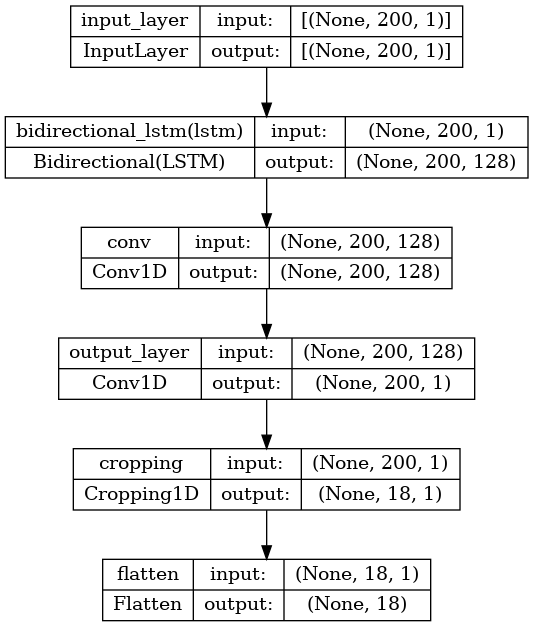

In [18]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [19]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
        callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, factor=0.1, min_lr=1e-5)
    ]
).history

Epoch 1/200
 225/3210 [=>............................] - ETA: 3:10 - loss: 0.0722

KeyboardInterrupt: 

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('DirectForecasting')
model = tfk.models.load_model('DirectForecasting')

In [ ]:
# Predict the test set using the model
predictions = model.predict(X_test, verbose=0)

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")